In [201]:
%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation

In [202]:
df = pd.read_csv('Dataset/train/Inertial Signals/body_acc_x_train.txt', header=None, delim_whitespace=True)
#X_train['subject'] = pd.read_csv('Dataset/train/subject_train.txt', header=None)
#y_train = pd.read_csv('Dataset/train/y_train.txt', header = None, names = ['Activity'])
#print(f"Number of time series: {X_train.shape[0]}\nLength: {X_train.shape[1]}")


In [203]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
norm_df = scaler.fit_transform(df)
norm_df = norm_df.squeeze()
df = pd.DataFrame(norm_df)

In [204]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.709901,2.675890,2.382460,0.951098,2.904276,0.604010,0.846195,1.341353,0.352956,1.803196,...,-0.291233,-1.284527,-0.750909,-0.623342,-1.049709,-0.693987,-0.873362,-1.161558,-0.846967,-0.235697
1,0.464438,2.209248,1.365748,1.046832,1.580552,1.131873,0.729369,0.407696,-0.083221,-0.270836,...,-0.140117,-0.159085,0.585142,0.690147,0.456042,-0.459017,-1.989214,-2.433157,-1.572540,-0.894783
2,1.066986,0.638496,-0.291520,-1.432367,-2.453015,-1.229748,0.104680,0.082536,0.596238,-0.472442,...,0.080000,0.489776,-0.239201,-0.282774,-0.243294,-0.255975,-0.097741,0.281227,0.924472,0.601566
3,-0.784818,-0.612708,0.021781,0.029409,-0.255732,0.249745,0.291255,-1.299021,-3.439735,-4.037477,...,0.048204,0.662268,0.384262,0.183079,-0.202018,-0.837987,-0.732209,-0.446782,-0.560578,-0.133412
4,0.140235,-0.038086,0.603969,1.647878,1.229941,0.536011,1.055758,1.223177,1.211866,1.176099,...,1.351554,1.842294,-0.026261,-1.272882,0.222071,1.958674,0.903667,-0.249263,-0.510118,-1.554606


In [205]:
# add subjects and ativities
df['Activity'] = pd.read_csv('Dataset/train/y_train.txt', header = None, names = ['Activity'])
df['subject'] = pd.read_csv('Dataset/train/subject_train.txt', header=None)


In [206]:
# trasformazione in problema binario
df.loc[df.Activity <4, 'Activity'] = 1 #1,2,3 Dinamiche
df.loc[df.Activity >3, 'Activity'] = 0 #4,5,6 Statiche


In [200]:
df

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,Activity,subject
0,-0.709901,2.675890,2.382460,0.951098,2.904276,0.604010,0.846195,1.341353,0.352956,1.803196,...,-0.750909,-0.623342,-1.049709,-0.693987,-0.873362,-1.161558,-0.846967,-0.235697,1,1
1,0.464438,2.209248,1.365748,1.046832,1.580552,1.131873,0.729369,0.407696,-0.083221,-0.270836,...,0.585142,0.690147,0.456042,-0.459017,-1.989214,-2.433157,-1.572540,-0.894783,1,1
2,1.066986,0.638496,-0.291520,-1.432367,-2.453015,-1.229748,0.104680,0.082536,0.596238,-0.472442,...,-0.239201,-0.282774,-0.243294,-0.255975,-0.097741,0.281227,0.924472,0.601566,1,1
3,-0.784818,-0.612708,0.021781,0.029409,-0.255732,0.249745,0.291255,-1.299021,-3.439735,-4.037477,...,0.384262,0.183079,-0.202018,-0.837987,-0.732209,-0.446782,-0.560578,-0.133412,1,1
4,0.140235,-0.038086,0.603969,1.647878,1.229941,0.536011,1.055758,1.223177,1.211866,1.176099,...,-0.026261,-1.272882,0.222071,1.958674,0.903667,-0.249263,-0.510118,-1.554606,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,1.467931,2.346007,2.939198,2.223038,0.811481,-0.121776,-0.671655,-0.853821,-0.543265,0.109015,...,-0.887136,-0.823091,-0.702216,-0.560087,-0.520923,-0.605597,-0.693013,-0.823571,1,30
7348,2.863228,2.852672,1.294281,-0.113115,-0.833056,-0.771563,-0.265124,-0.166812,0.236473,0.432406,...,-1.098202,-1.307365,-1.521840,-1.533912,-1.488155,-1.183610,-0.815876,-0.497331,1,30
7349,-0.887716,-0.695513,-0.589595,-0.516361,-0.265208,0.034341,0.382608,0.812418,1.738079,2.609027,...,-1.230352,-1.439370,-1.549677,-1.361812,-1.253973,-1.155844,-0.953298,-0.842505,1,30
7350,-0.264812,-0.324338,-0.278757,-0.161204,-0.122648,0.062356,0.295454,0.988064,1.988463,2.288293,...,-1.571450,-1.638553,-1.501527,-1.413085,-1.259650,-1.249411,-1.311276,-1.081507,1,30


# Sequential Pattern mining on dynamic activities

Utilizzo di tutte le azioni dinamiche: in totale 3285 di 128 timestraps

In [209]:
df_dynamic = df[df['Activity']==1]

In [210]:
df_dynamic=df_dynamic.iloc[:,:-2]
df_dynamic

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
78,1.717907,1.741972,0.540633,-1.329192,-1.445998,-0.383854,0.102221,0.039370,-0.235549,-0.322804,...,1.495581,1.570526,1.818810,1.848009,1.233051,-0.578061,-1.936185,-1.324260,-0.055312,0.420306
79,1.705480,1.986946,1.226959,-0.096186,-1.222110,-1.390121,-0.747471,-0.098899,0.167835,0.177568,...,0.219371,0.080284,-0.238472,-0.675444,-0.691001,-0.953482,-1.537435,-1.239696,-0.552175,-0.141731
80,0.082487,-0.629531,-1.039072,-1.104260,-1.276155,-0.890028,-0.133154,0.015919,-0.244516,-0.511720,...,0.007519,-0.697110,-0.531232,-0.474817,-0.197516,0.086293,-0.117984,0.144273,0.307089,0.421564
81,-0.126786,-0.436338,-0.449857,-0.211521,-0.109243,0.065808,0.112630,0.215421,0.782292,1.423623,...,0.762734,0.749907,0.946685,0.978750,0.446065,-0.347146,-0.495219,0.487856,1.699624,2.067811
82,0.838302,1.026474,0.993983,0.599829,0.096148,0.263277,0.951549,1.552579,1.486943,0.748543,...,1.078343,0.175815,-0.721367,-0.888202,-0.787210,-1.237732,-1.508790,-1.322667,-1.417069,-1.338409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,1.467931,2.346007,2.939198,2.223038,0.811481,-0.121776,-0.671655,-0.853821,-0.543265,0.109015,...,-0.888048,-0.961273,-0.887136,-0.823091,-0.702216,-0.560087,-0.520923,-0.605597,-0.693013,-0.823571
7348,2.863228,2.852672,1.294281,-0.113115,-0.833056,-0.771563,-0.265124,-0.166812,0.236473,0.432406,...,-1.249931,-1.267677,-1.098202,-1.307365,-1.521840,-1.533912,-1.488155,-1.183610,-0.815876,-0.497331
7349,-0.887716,-0.695513,-0.589595,-0.516361,-0.265208,0.034341,0.382608,0.812418,1.738079,2.609027,...,-0.692502,-0.973039,-1.230352,-1.439370,-1.549677,-1.361812,-1.253973,-1.155844,-0.953298,-0.842505
7350,-0.264812,-0.324338,-0.278757,-0.161204,-0.122648,0.062356,0.295454,0.988064,1.988463,2.288293,...,-0.957441,-1.312035,-1.571450,-1.638553,-1.501527,-1.413085,-1.259650,-1.249411,-1.311276,-1.081507


In [218]:
df_dynamic.shape

(3285, 128)

## Trasformazione in sequenze

Trasformazione delle Time Series in sequenze applicando in primis la SAX approximation con 40 segmenti e 20 simboli

In [219]:
# SAX transform
n_paa_segments = 40
n_sax_symbols = 20
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(df_dynamic)
ts_sax_inv = sax.inverse_transform(ts_sax)

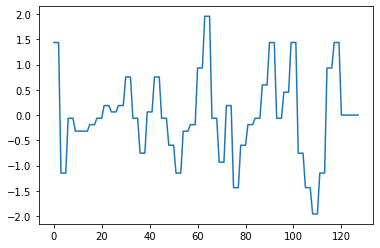

In [220]:
# plot first tranformed ts
plt.plot(ts_sax_inv[0])

Si ottiene un numpy array di dimensione 40: rappresentazione di ciascuna riga come sequenza di 1 transazione di 40 eventi ciascuna

In [235]:
ts_sax[0].ravel()

array([18,  2,  9,  7,  7,  8,  9, 11, 10, 11, 15,  9,  4, 10, 15,  9,  5,
        2,  7,  8, 16, 19,  9,  3, 11,  1,  5,  8,  9, 14, 18,  9, 13, 18,
        4,  1,  0,  2, 16, 18])

Trasformazione in 20 transazioni di 2 eventi ciascuna. Si ottiene uno span = 20 transazioni per sequenza

In [224]:
# Create a function called "chunks" with two arguments, l and n:
def chunks(l, n):
    # For item i in a range that is a length of l,
    for i in range(0, len(l), n):
        # Create an index range for l of n items:
        yield tuple(l[i:i+n])

In [230]:
# chuck a list into a list of tuples 

seq_lst = []
for idx in range(len(ts_sax)):
    single_sequence = []
    
    for seq in (chunks(ts_sax[idx].ravel(), 2)):      #3 events per transaction
        single_sequence.append(seq)        
    seq_lst.append(single_sequence)  

In [231]:
len(seq_lst[0])

20

In [240]:
print(seq_lst[0])

[(18, 2), (9, 7), (7, 8), (9, 11), (10, 11), (15, 9), (4, 10), (15, 9), (5, 2), (7, 8), (16, 19), (9, 3), (11, 1), (5, 8), (9, 14), (18, 9), (13, 18), (4, 1), (0, 2), (16, 18)]


## Extracting frequent sequences

In [31]:
!pip install prefixspan

  Created wheel for prefixspan: filename=prefixspan-0.5.2-py3-none-any.whl size=11239 sha256=283470a82adb20d280e1d42b45ec93c2840ad112b27917c7986c7b04dcaac016
  Stored in directory: c:\users\info\appdata\local\pip\cache\wheels\13\c9\8d\4e8ae7e9db7a435d63161a1e8d4c9bc50795078840a8d948b1
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=19fa1cbe05434242ffc97ce8d549e1afe1040bec88a55a4edaee6a6c268c8b0b
  Stored in directory: c:\users\info\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
  Created wheel for extratools: filename=extratools-0.8.2.1-py3-none-any.whl size=28885 sha256=a98b0d4a61b172b7bf8427784e69188fcb61ef77f95846aeaa1b4b47de0db76c
  Stored in directory: c:\users\info\appdata\local\pip\cache\wheels\f0\fd\a0\de2750b15ae6ca6f016954f5454f545f7583a1ab71ca2cc35d
Successfully built prefixspan docopt extratools


In [243]:
from prefixspan import PrefixSpan #algoritmo per sequential pattern

In [244]:
ps = PrefixSpan(seq_lst)

In [245]:
ps.topk(10)

[(687, [(2, 3)]),
 (679, [(2, 2)]),
 (663, [(18, 19)]),
 (637, [(1, 2)]),
 (621, [(3, 3)]),
 (605, [(3, 4)]),
 (593, [(2, 4)]),
 (581, [(4, 4)]),
 (580, [(3, 5)]),
 (577, [(1, 1)])]

Min support di 14% e 10%

In [246]:
# frequent takes the number of matches not expressed in percetage.
ps.frequent(len(seq_lst) * 0.14)         #min support  14%

#(n matches, [(frequent sequences)])

[(679, [(2, 2)]),
 (537, [(3, 2)]),
 (577, [(1, 1)]),
 (477, [(19, 17)]),
 (605, [(3, 4)]),
 (553, [(18, 18)]),
 (469, [(4, 6)]),
 (637, [(1, 2)]),
 (621, [(3, 3)]),
 (486, [(2, 1)]),
 (463, [(1, 3)]),
 (580, [(3, 5)]),
 (549, [(19, 18)]),
 (545, [(17, 19)]),
 (593, [(2, 4)]),
 (484, [(19, 19)]),
 (581, [(4, 4)]),
 (478, [(5, 5)]),
 (558, [(4, 3)]),
 (663, [(18, 19)]),
 (468, [(5, 4)]),
 (509, [(4, 5)]),
 (687, [(2, 3)])]

In [247]:
ps.frequent(len(seq_lst) * 0.10)         #min support  10%

[(351, [(5, 2)]),
 (406, [(16, 19)]),
 (679, [(2, 2)]),
 (410, [(17, 18)]),
 (537, [(3, 2)]),
 (577, [(1, 1)]),
 (377, [(6, 7)]),
 (477, [(19, 17)]),
 (605, [(3, 4)]),
 (553, [(18, 18)]),
 (333, [(1, 4)]),
 (469, [(4, 6)]),
 (349, [(3, 7)]),
 (637, [(1, 2)]),
 (621, [(3, 3)]),
 (486, [(2, 1)]),
 (368, [(6, 3)]),
 (463, [(1, 3)]),
 (336, [(18, 17)]),
 (580, [(3, 5)]),
 (427, [(2, 5)]),
 (456, [(5, 6)]),
 (439, [(4, 2)]),
 (549, [(19, 18)]),
 (545, [(17, 19)]),
 (329, [(2, 6)]),
 (593, [(2, 4)]),
 (441, [(3, 6)]),
 (347, [(3, 1)]),
 (484, [(19, 19)]),
 (394, [(6, 4)]),
 (581, [(4, 4)]),
 (478, [(5, 5)]),
 (366, [(19, 15)]),
 (397, [(5, 7)]),
 (558, [(4, 3)]),
 (348, [(6, 6)]),
 (663, [(18, 19)]),
 (390, [(4, 7)]),
 (424, [(5, 3)]),
 (359, [(15, 19)]),
 (371, [(6, 5)]),
 (468, [(5, 4)]),
 (509, [(4, 5)]),
 (687, [(2, 3)]),
 (412, [(19, 16)])]

# Sequential Pattern mining on Static activities

Utilizzo di tutte le azioni dinamiche: in totale 4067 di 128 timestraps

In [250]:
df_static = df[df['Activity']==0]

In [251]:
df_static=df_static.iloc[:,:-2]
df_static

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.709901,2.675890,2.382460,0.951098,2.904276,0.604010,0.846195,1.341353,0.352956,1.803196,...,-0.291233,-1.284527,-0.750909,-0.623342,-1.049709,-0.693987,-0.873362,-1.161558,-0.846967,-0.235697
1,0.464438,2.209248,1.365748,1.046832,1.580552,1.131873,0.729369,0.407696,-0.083221,-0.270836,...,-0.140117,-0.159085,0.585142,0.690147,0.456042,-0.459017,-1.989214,-2.433157,-1.572540,-0.894783
2,1.066986,0.638496,-0.291520,-1.432367,-2.453015,-1.229748,0.104680,0.082536,0.596238,-0.472442,...,0.080000,0.489776,-0.239201,-0.282774,-0.243294,-0.255975,-0.097741,0.281227,0.924472,0.601566
3,-0.784818,-0.612708,0.021781,0.029409,-0.255732,0.249745,0.291255,-1.299021,-3.439735,-4.037477,...,0.048204,0.662268,0.384262,0.183079,-0.202018,-0.837987,-0.732209,-0.446782,-0.560578,-0.133412
4,0.140235,-0.038086,0.603969,1.647878,1.229941,0.536011,1.055758,1.223177,1.211866,1.176099,...,1.351554,1.842294,-0.026261,-1.272882,0.222071,1.958674,0.903667,-0.249263,-0.510118,-1.554606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7257,-0.805562,-0.804545,-0.541952,-0.220166,-0.678361,-1.078862,-1.249895,-1.775205,-1.960339,-1.194097,...,-0.624024,-0.802003,-0.642894,-0.466214,-0.140328,0.166820,-0.166201,-0.323314,0.187917,0.694016
7258,3.089193,3.254704,2.928151,2.121798,1.206844,0.599681,0.180592,0.133014,0.295463,0.376148,...,-1.345416,-1.291494,-1.325319,-1.509676,-1.912090,-1.979081,-1.853853,-1.649230,-1.120526,-0.929263
7259,1.541773,0.941414,0.495124,0.964666,1.370627,1.215017,1.093924,1.092854,0.715810,0.410101,...,0.398901,0.821054,0.388515,-0.072240,-0.042310,-0.131769,-0.278355,-0.720774,-0.523066,-0.558659
7260,-1.411961,-1.984701,-1.738431,-1.560895,-1.847970,-1.547509,-1.117250,-0.776319,-0.700935,-1.050194,...,0.978186,1.164232,1.462620,1.487807,1.277642,0.713372,0.533841,0.508826,0.169599,0.083486


In [252]:
df_static.shape

(4067, 128)

## Trasformazione in sequenze

Trasformazione delle Time Series in sequenze applicando in primis la SAX approximation con 40 segmenti e 20 simboli

In [260]:
# SAX transform
n_paa_segments = 40
n_sax_symbols = 20
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(df_static)
ts_sax_inv = sax.inverse_transform(ts_sax)

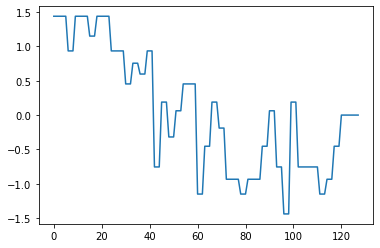

In [261]:
# plot first tranformed ts
plt.plot(ts_sax_inv[0])

Si ottiene un numpy array di dimensione 40: rappresentazione di ciascuna riga come sequenza di 1 transazione di 40 eventi ciascuna

In [262]:
ts_sax[0].ravel()

array([18, 18, 16, 18, 18, 17, 18, 18, 16, 16, 13, 15, 14, 16,  4, 11,  7,
       10, 13, 13,  2,  6, 11,  8,  3,  3,  2,  3,  3,  6, 10,  4,  1, 11,
        4,  4,  4,  2,  3,  6])

Trasformazione in 20 transazioni di 2 eventi ciascuna. Si ottiene uno span = 20 transazioni per sequenza

In [263]:
# Create a function called "chunks" with two arguments, l and n:
def chunks(l, n):
    # For item i in a range that is a length of l,
    for i in range(0, len(l), n):
        # Create an index range for l of n items:
        yield tuple(l[i:i+n])

In [264]:
# chuck a list into a list of tuples 

seq_lst = []
for idx in range(len(ts_sax)):
    single_sequence = []
    
    for seq in (chunks(ts_sax[idx].ravel(), 2)):      #3 events per transaction
        single_sequence.append(seq)        
    seq_lst.append(single_sequence)  

In [265]:
len(seq_lst[0])

20

In [266]:
print(seq_lst[0])

[(18, 18), (16, 18), (18, 17), (18, 18), (16, 16), (13, 15), (14, 16), (4, 11), (7, 10), (13, 13), (2, 6), (11, 8), (3, 3), (2, 3), (3, 6), (10, 4), (1, 11), (4, 4), (4, 2), (3, 6)]


## Extracting frequent sequences

In [31]:
!pip install prefixspan

  Created wheel for prefixspan: filename=prefixspan-0.5.2-py3-none-any.whl size=11239 sha256=283470a82adb20d280e1d42b45ec93c2840ad112b27917c7986c7b04dcaac016
  Stored in directory: c:\users\info\appdata\local\pip\cache\wheels\13\c9\8d\4e8ae7e9db7a435d63161a1e8d4c9bc50795078840a8d948b1
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=19fa1cbe05434242ffc97ce8d549e1afe1040bec88a55a4edaee6a6c268c8b0b
  Stored in directory: c:\users\info\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
  Created wheel for extratools: filename=extratools-0.8.2.1-py3-none-any.whl size=28885 sha256=a98b0d4a61b172b7bf8427784e69188fcb61ef77f95846aeaa1b4b47de0db76c
  Stored in directory: c:\users\info\appdata\local\pip\cache\wheels\f0\fd\a0\de2750b15ae6ca6f016954f5454f545f7583a1ab71ca2cc35d
Successfully built prefixspan docopt extratools


In [267]:
from prefixspan import PrefixSpan #algoritmo per sequential pattern

In [268]:
ps = PrefixSpan(seq_lst)

In [269]:
ps.topk(10)

[(526, [(18, 18)]),
 (518, [(3, 3)]),
 (512, [(4, 4)]),
 (505, [(2, 2)]),
 (501, [(19, 19)]),
 (477, [(2, 3)]),
 (469, [(16, 16)]),
 (459, [(17, 17)]),
 (452, [(6, 6)]),
 (449, [(1, 2)])]

Min support di 14% e 10%

In [278]:
# frequent takes the number of matches not expressed in percetage.
ps.frequent(len(seq_lst) * 0.11)         #min support  14%

#(n matches, [(frequent sequences)])

[(526, [(18, 18)]),
 (469, [(16, 16)]),
 (518, [(3, 3)]),
 (477, [(2, 3)]),
 (512, [(4, 4)]),
 (452, [(6, 6)]),
 (459, [(17, 17)]),
 (505, [(2, 2)]),
 (501, [(19, 19)]),
 (449, [(1, 2)])]

In [279]:
ps.frequent(len(seq_lst) * 0.10)         #min support  10%

[(526, [(18, 18)]),
 (432, [(18, 17)]),
 (469, [(16, 16)]),
 (418, [(13, 13)]),
 (518, [(3, 3)]),
 (477, [(2, 3)]),
 (512, [(4, 4)]),
 (409, [(8, 8)]),
 (427, [(9, 9)]),
 (438, [(3, 2)]),
 (418, [(11, 11)]),
 (444, [(1, 1)]),
 (452, [(6, 6)]),
 (440, [(3, 4)]),
 (425, [(5, 4)]),
 (445, [(5, 5)]),
 (459, [(17, 17)]),
 (435, [(15, 15)]),
 (435, [(14, 14)]),
 (439, [(15, 14)]),
 (418, [(16, 17)]),
 (412, [(15, 16)]),
 (505, [(2, 2)]),
 (417, [(4, 5)]),
 (434, [(0, 0)]),
 (411, [(17, 18)]),
 (501, [(19, 19)]),
 (408, [(4, 3)]),
 (449, [(1, 2)])]

Necessario un min support minore per poter estrarre delle frequent patterns